
#    Deep Learning Course 2019
######  Lecturer: Assistant prof. Siamak Mehrkanoon
####  =====================================================================================================

## Assignment-1:

### Download the Iris data and explore it, (visualize it, how many classes, instances, features, etc)
### Select feature number 0 and 2 and the first 100 samples and do the following analysis: 

### 1) Implement the logistic regression model that discussed in the class (with and without regularization). Use Gradient descent algorithm for updating the parameters. Plot the results.

### 2) Explore the influence of learning rate on the convergence of the model. Tune the learning rate.

### 3) Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 and 3) and compare the results.

### 4) Give the option to the users to select whatever combination of features they want and your code will do the rest.

### 5)  Try your model on Monk2 dataset and report the results, (test accuracy, training accuracy, optimal learning rate, loss value). Use the last 20% of the data as test.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()
df = df[:100]
classes = df[4].unique()

# Normalize the date
samples = df.copy()
samples[4][samples[4] == classes[0]] = 0
samples[4][samples[4] == classes[1]] = 1
samples = preprocessing.MinMaxScaler().fit_transform(samples)
#samples = preprocessing.scale(samples)
#forwardPass(df[0])
#print(samples)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Looking at the dataset and having a look at how many classes and min max of each features. Have a look whether there are missing values. If so, how do I fill them up? How many samples do we have?

In [3]:
print(f'Number of samples: {len(df)}')
print(f'Classes: {classes}')
print(f'First Feature  min: {np.min(df[0])} max: {np.max(df[0])} mean: {np.mean(df[0]):.2f} median: {np.median(df[0])} Std: {np.std(df[0]):.2f}')
print(f'Second Feature min: {np.min(df[1])} max: {np.max(df[1])} mean: {np.mean(df[1]):.2f} median: {np.median(df[1])} Std: {np.std(df[1]):.2f}')
print(f'Third Feature  min: {np.min(df[2])} max: {np.max(df[2])} mean: {np.mean(df[2]):.2f} median: {np.median(df[2])} Std: {np.std(df[2]):.2f}')
print(f'Fourth Feature min: {np.min(df[3])} max: {np.max(df[3])} mean: {np.mean(df[3]):.2f} median: {np.median(df[3])} Std: {np.std(df[3]):.2f}')
# check for missing values
print(f'Missing Entries: {np.sum(pd.isna(df))}')

Number of samples: 100
Classes: ['Iris-setosa' 'Iris-versicolor']
First Feature  min: 4.3 max: 7.0 mean: 5.47 median: 5.4 Std: 0.64
Second Feature min: 2.0 max: 4.4 mean: 3.09 median: 3.05 Std: 0.47
Third Feature  min: 1.0 max: 5.1 mean: 2.86 median: 2.45 Std: 1.44
Fourth Feature min: 0.1 max: 1.8 mean: 0.78 median: 0.8 Std: 0.56
Missing Entries: 0    0
1    0
2    0
3    0
4    0
dtype: int64


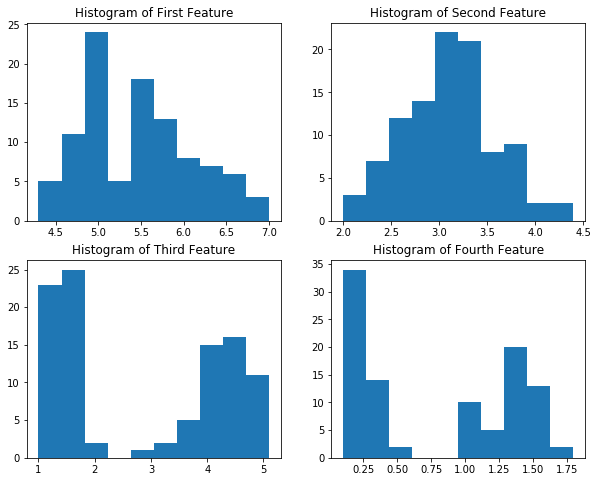

In [4]:
fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(df[0])
plt.title('Histogram of First Feature')
plt.subplot(222)
plt.hist(df[1])
plt.title('Histogram of Second Feature')
plt.subplot(223)
plt.hist(df[2])
plt.title('Histogram of Third Feature')
plt.subplot(224)
plt.hist(df[3])
plt.title('Histogram of Fourth Feature')
plt.show()

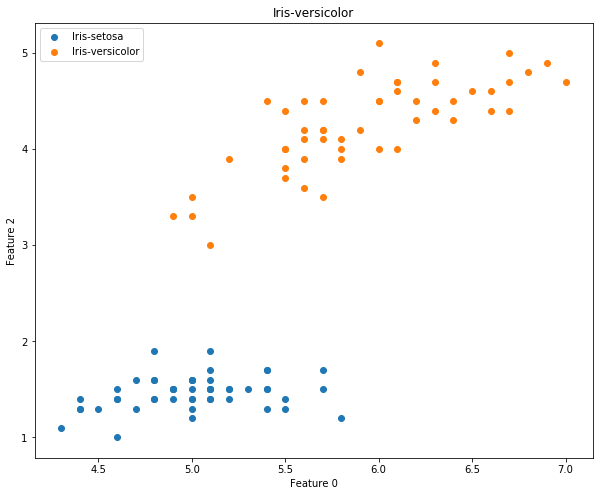

In [5]:
plt.figure(figsize=(10,8))
for i, c in enumerate(classes):
    #plt.subplot(1,3,i+1)
    plt.title(c)
    plt.scatter(df[df[4] == c][0], df[df[4] == c][2], label=c)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 2')
    plt.legend()

plt.show()

The neural network consists of 2 input neurons (since we have 2 features as input) and one neuron in the output layer.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivedSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [242]:
class NN:
    #weights2 = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(2, 1))
    
    
    def __init__(self, learning_rate, epochs, regularization, regularizationTerm=None):
        self.learning_rate = learning_rate
        self.regularization = regularization
        if regularization:
            self.lamReg = regularizationTerm
        self.maxEpochs = epochs
        self.errors = []
        # weight initialization is in range -4*sqrt(6/numNeuronsInLayer) and +4*sqrt(6/numNeuronsInLayer)
        self.weights = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(3, 1))

    def forwardPass(self, x):
        if len(x.shape) == 1:
            x = x.reshape(-1, 1).T
        
        # adding bias
        self.inp = np.hstack((np.ones((len(x), 1)), x))
        self.z = np.dot(self.inp, self.weights)
        self.prediction = sigmoid(self.z)
        return self.prediction
    
    
    def train(self,data):
        samples = data[:, :2]
        targets = data[:, 2]
        
        epochs = 0
        converged = False        
        while not converged:
            epochs += 1
            totalError = 0.0
            samples = np.random.permutation(samples)

            regTerm = self.lamReg/2 *np.sum(self.weights**2) if self.regularization else 0
            totalError = self.logLossFunction(self.forwardPass(samples).T, np.expand_dims(targets, axis=0), False)
            totalError = np.sum(totalError)
                      
            loss = self.logLossFunction(self.forwardPass(samples).T, np.expand_dims(targets, axis=0), True)
            
#             print(loss)
#             print(self.inp.shape)
#             print(loss.shape)
            
            gradient = np.dot(self.inp.T, loss.T)
#             print(gradient)
#             print(gradient.shape)
#             print()
#             break

            # bias (without regularization)
#             print(self.weights)
            self.weights[0]  -= self.learning_rate * gradient[0]
            # other weights
            self.weights[1:] -= self.learning_rate * gradient[1:] + regTerm
#             print(self.weights)
#             break
            
#             totalError = np.sum(np.abs(loss))
            self.errors.append(totalError)
            if epochs%100 == 0:
                print(f'Error in epoch {epochs}: {totalError}')
            if self.maxEpochs != 0:
                if epochs >= self.maxEpochs:
                    break
            if np.abs(totalError) < 0.005:
                converged = True
        print(f'Converged after {epochs} epochs.')
        
    def lossFunction(self, pred, target, derived=False):
        if not derived:
            return -0.5*(target-pred)**2
        else:
            return -(target-pred)
        
    
    def logLossFunction(self, pred, target, derived=False):
        if not derived:
            # this is to avoid NaNs
#             pred[pred == 0.0] += 0.0001
#             pred[pred == 1.0] -= 0.0001
            eps = 1e-15
            pred = np.clip(pred, eps, 1-eps)
            return -target*np.log(pred)-(1-target)*np.log(1-pred)
        else:
            return -(target-pred)


In [243]:
def trainNN(samples, featuresToDelete, learning_rate, epochs, regularization, regularizationTerm=None):
    # Putting these in vector shapes
    nn = NN(learning_rate, epochs, regularization, regularizationTerm)
    print(f'Weights at the start: {nn.weights}')
    # only use features 0 and 2
    data = np.delete(samples, featuresToDelete, axis=1)
    data = np.random.permutation(data)
    data_train = data[:int(0.8*len(data))]
    # print(data_train)
    data_test = data[int(0.8*len(data)):]
    nn.train(data_train)

    # print(data_test)
    # test
    test_error = np.mean(np.abs(data_test[:, 2] - nn.forwardPass(data_test[:, :2]))**2)

#     test_error = test_error/len(data_test)
    print(f'Test Error: {test_error}')

    n=10
    print(f'Target: {data_test[:, 2]} prediction: {nn.forwardPass(data_test[:, :2])}')
    print(f'Weights: {nn.weights}')
    return nn

### Regularization on

In [244]:
nn = trainNN(samples, [1, 3], learning_rate = 0.01, epochs=1000, regularization=False, regularizationTerm=0.001)

Weights at the start: [[4.67174022]
 [2.00417501]
 [2.57256815]]
[[37.82341487]
 [17.02681348]
 [18.45715979]]
[[4.67174022]
 [2.00417501]
 [2.57256815]]
[[4.29350607]
 [1.83390687]
 [2.38799655]]
Converged after 1 epochs.
Test Error: 0.5943253786564423
Target: [0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.] prediction: [[0.98939911]
 [0.99874725]
 [0.99945057]
 [0.99235549]
 [0.98939911]
 [0.9997397 ]
 [0.99174374]
 [0.99963799]
 [0.99416358]
 [0.99925061]
 [0.99410715]
 [0.99427581]
 [0.99963085]
 [0.99762564]
 [0.99518826]
 [0.99975913]
 [0.9932555 ]
 [0.99485182]
 [0.98898339]
 [0.9932555 ]]
Weights: [[4.29350607]
 [1.83390687]
 [2.38799655]]


### Regularization off

In [10]:
nn2 = trainNN(samples, [1, 3], learning_rate = 0.01, epochs=1000, regularization=False)


Weights at the start: [[ 5.03283716]
 [ 3.23034785]
 [-2.4153025 ]]
Error in epoch 100: 259.9158813005866
Error in epoch 200: 314.7960493141206
Error in epoch 300: 392.0709485923339
Error in epoch 400: 501.849269679269
Error in epoch 500: 674.676140706593
Error in epoch 600: 708.7647013556133
Error in epoch 700: 729.6362452599055
Error in epoch 800: 672.5818832279494
Error in epoch 900: 603.3186556232438
Error in epoch 1000: 597.0815675056521
Converged after 1000 epochs.
Test Error: 0.44999960551919693
Target: [1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.] prediction: [[1.        ]
 [0.99999157]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999999]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999999]
 [0.99999999]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999997]
 [1.        ]
 [1.        ]
 [0.99999972]]
Weights: [[ 5.03283716]
 [33.01354134]
 [30.5784273 ]]


[[-0.54239991]
 [        nan]
 [        nan]]
[[ 5.03283716]
 [33.01354134]
 [30.5784273 ]]


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


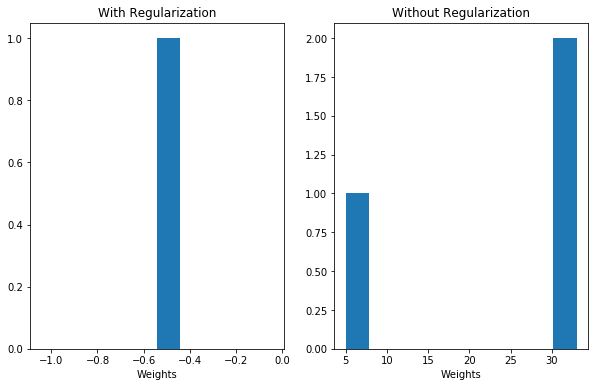

In [11]:
# look at weights --> are they huge?
# what if regularization is used?
print(nn.weights)
print(nn2.weights)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title("With Regularization")
plt.xlabel('Weights')
plt.hist(nn.weights)
plt.subplot(122)
plt.title("Without Regularization")
plt.xlabel('Weights')
plt.hist(nn2.weights)
plt.show()

## 4) To train the NN with other features one has to give the function trainNN the parameter features to delete. In the previous calls the features 1 and 3 were deleted. If we want to train on features 1 and 3 we have to delete features 0 and 2:

In [12]:
nn2 = trainNN(samples, [0, 2], learning_rate = 0.01, epochs=1000, regularization=False)

Weights at the start: [[ 2.38378253]
 [ 0.03249757]
 [-4.98233421]]
Error in epoch 100: 71.84281324645235
Error in epoch 200: 91.21492296810786
Error in epoch 300: 92.67303426565016
Error in epoch 400: 106.73768466445355
Error in epoch 500: 108.5260436551462
Error in epoch 600: 126.17804134880406
Error in epoch 700: 141.13634746209954
Error in epoch 800: 164.17788733491068
Error in epoch 900: 185.15088393704744
Error in epoch 1000: 227.84944124127406
Converged after 1000 epochs.
Test Error: 0.4463477833610429
Target: [1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.] prediction: [[0.9912739 ]
 [0.98769519]
 [0.99996049]
 [0.98795342]
 [0.99751005]
 [0.99631215]
 [0.99533428]
 [0.99368498]
 [0.99744661]
 [0.99972694]
 [0.99990156]
 [0.9981622 ]
 [0.99662727]
 [0.9963902 ]
 [0.99811534]
 [0.99986069]
 [0.99973274]
 [0.99354881]
 [0.99552952]
 [0.99340973]]
Weights: [[ 2.38378253]
 [ 7.81962028]
 [-0.36500425]]


In [13]:
lrates = [0.0001, 0.001, 0.01, 0.1, 1]
for lr in lrates:
    print(f'Learning rate: {lr}')
    trainNN(samples, [1, 3], learning_rate = lr, epochs=1000, regularization=True, regularizationTerm=0.001)


Learning rate: 0.0001
Weights at the start: [[ 0.88937005]
 [ 1.04259906]
 [-3.93381421]]
Error in epoch 100: 73.80509987335938
Error in epoch 200: 105.3453898036371
Error in epoch 300: 226.9493263430875
Error in epoch 400: 1636.7036327689705
Error in epoch 500: nan
Error in epoch 600: nan
Error in epoch 700: nan
Error in epoch 800: nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in square


Error in epoch 900: nan
Error in epoch 1000: nan
Converged after 1000 epochs.
Test Error: nan
Target: [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.] prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Weights: [[0.88937005]
 [       nan]
 [       nan]]
Learning rate: 0.001
Weights at the start: [[ 5.38068569]
 [ 5.16510381]
 [-0.30954315]]
Error in epoch 100: 202.58020825294574
Error in epoch 200: 133.23365394917445
Error in epoch 300: 117.7240074545031
Error in epoch 400: 570.4332968507435
Error in epoch 500: nan
Error in epoch 600: nan
Error in epoch 700: nan
Error in epoch 800: nan
Error in epoch 900: nan
Error in epoch 1000: nan
Converged after 1000 epochs.
Test Error: nan
Target: [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.] prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [na

### Since our implementation is still faulty we can not conclude anything from different learning rates.

## Part 2

In [14]:
import scipy.io as sio
monk2 = sio.loadmat('monk2.mat')['monk2']
print(monk2)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 2 1]
 [1 1 1 ... 2 2 1]
 ...
 [3 2 2 ... 4 1 0]
 [3 2 2 ... 4 1 0]
 [3 3 1 ... 4 2 0]]
